In [1]:
import pandas as pd         # Pandas for data manipulation
import numpy as np          # Numpy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import mne                  # MNE for EEG/MEG data analysis
import os
from mne.preprocessing import ICA

%matplotlib qt

### Convert the DataFrame to a numpy array and create an MNE RawArray

In [2]:
ch_names =  ['FP1', 'FP2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2']

In [3]:
file_path = os.path.join("data", "RecA.txt")
RecA_df = pd.read_csv(file_path, header=4, index_col=False, usecols=range(1,9))

file_path = os.path.join("data", "RecB.txt")
RecB_df = pd.read_csv(file_path, header=4, index_col=False, usecols=range(1,9))

In [4]:
RecA_df.columns = ch_names
RecB_df.columns = ch_names

In [5]:
RecA_df_transposed = RecA_df.T * 1e-6
RecB_df_transposed = RecB_df.T * 1e-6

In [6]:
ch_types = ['eeg'] * len(ch_names)  
info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types=ch_types)

RecA_data = RecA_df_transposed.to_numpy()
RecB_data = RecB_df_transposed.to_numpy()

RecA_raw = mne.io.RawArray(RecA_data, info)
RecB_raw = mne.io.RawArray(RecB_data, info)

montage = mne.channels.read_custom_montage('electrode_positions_8channel.sfp')
RecA_raw.set_montage(montage)
RecB_raw.set_montage(montage)

Creating RawArray with float64 data, n_channels=8, n_times=6217
    Range : 0 ... 6216 =      0.000 ...    24.864 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=6401
    Range : 0 ... 6400 =      0.000 ...    25.600 secs
Ready.


C:\Users\yuans\AppData\Local\Temp\ipykernel_20288\1157345798.py:11: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  RecA_raw.set_montage(montage)
C:\Users\yuans\AppData\Local\Temp\ipykernel_20288\1157345798.py:12: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  RecB_raw.set_montage(montage)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


### Apply bandpass filter from 0.1 to 100 Hz

Using matplotlib as 2D backend.


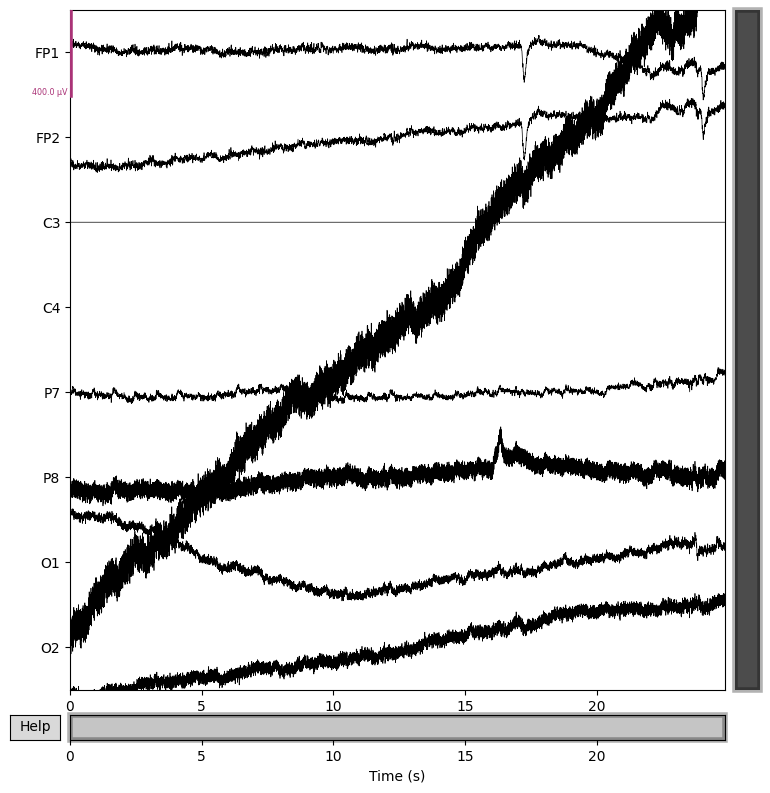

In [7]:
RecA_raw.plot(duration=25, scalings=dict(eeg=200e-6), clipping=None)

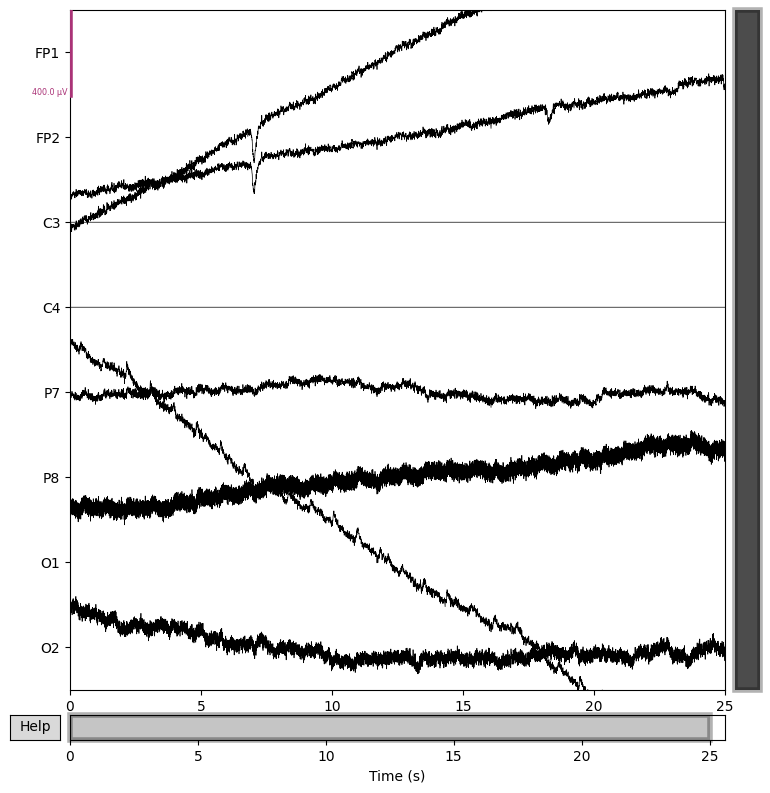

In [8]:
RecB_raw.plot(duration=25, scalings=dict(eeg=200e-6), clipping=None)

In [9]:
RecA_raw.filter(l_freq=0.1, h_freq=100)
RecA_raw.notch_filter(freqs=60)

RecB_raw.filter(l_freq=0.1, h_freq=100)
RecB_raw.notch_filter(freqs=60)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper pass

C:\Users\yuans\AppData\Local\Temp\ipykernel_20288\3040474102.py:1: RuntimeWarning: filter_length (8251) is longer than the signal (6217), distortion is likely. Reduce filter length or filter a longer signal.
  RecA_raw.filter(l_freq=0.1, h_freq=100)
C:\Users\yuans\AppData\Local\Temp\ipykernel_20288\3040474102.py:4: RuntimeWarning: filter_length (8251) is longer than the signal (6401), distortion is likely. Reduce filter length or filter a longer signal.
  RecB_raw.filter(l_freq=0.1, h_freq=100)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.10 Hz
Lowpass,100.00 Hz


### Preliminary plotting and rejection of bad channels

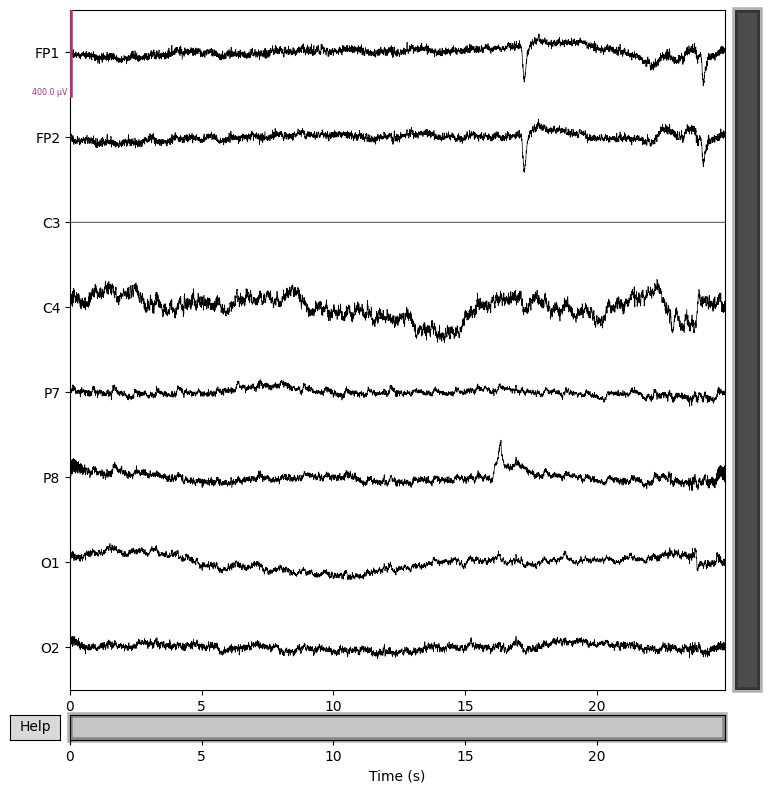

In [10]:
RecA_raw.plot(duration=25, scalings=dict(eeg=200e-6), clipping=None)

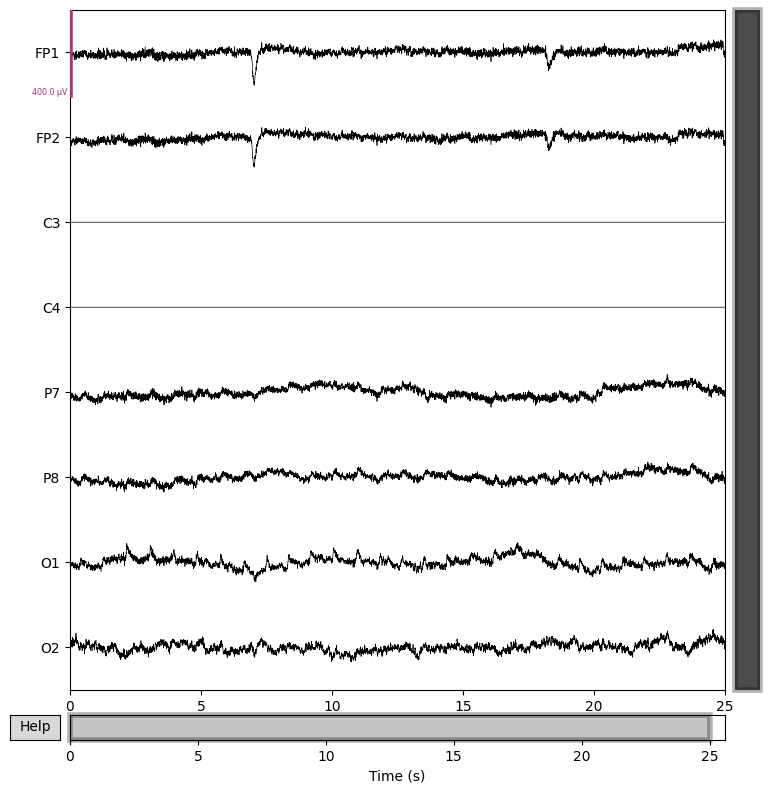

In [11]:
RecB_raw.plot(duration=25, scalings=dict(eeg=200e-6), clipping=None)

In [12]:
badChanns = ['C3', 'C4']

RecA_raw.info["bads"].extend(badChanns)
RecB_raw.info["bads"].extend(badChanns)

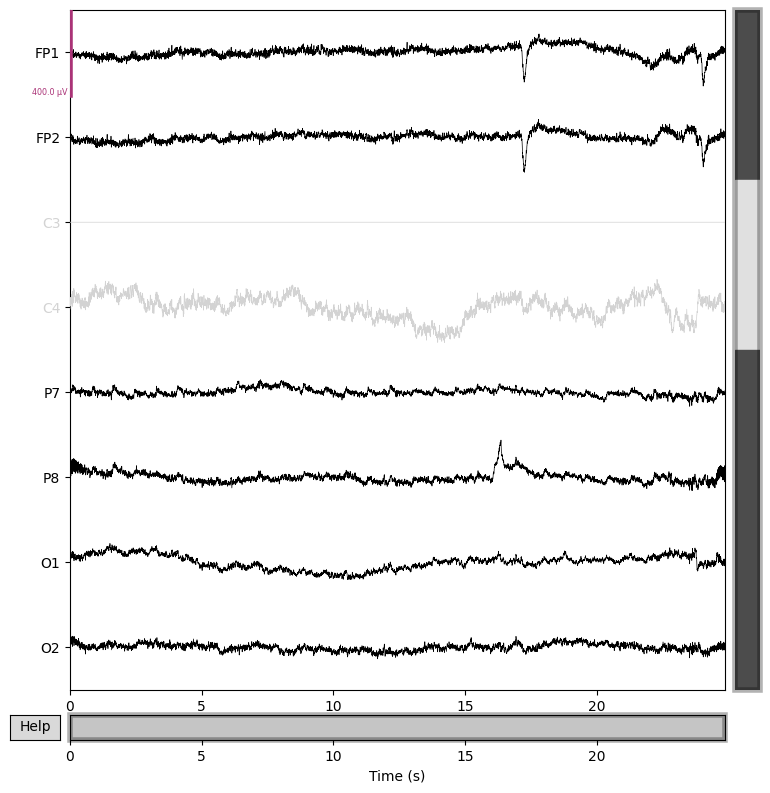

In [13]:
RecA_raw.plot(duration=25, scalings=dict(eeg=200e-6), clipping=None)

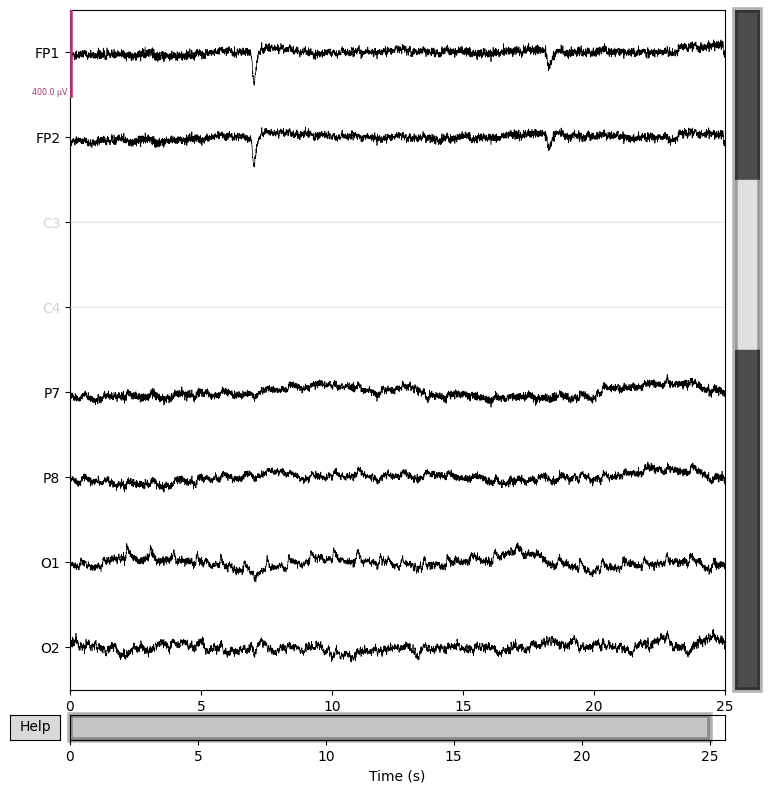

In [14]:
RecB_raw.plot(duration=25, scalings=dict(eeg=200e-6), clipping=None)

### Plot the spectral response for each channel


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\yuans\AppData\Local\Temp\ipykernel_20288\3054666383.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  RecA_raw.compute_psd(fmin=1, fmax=30).plot()


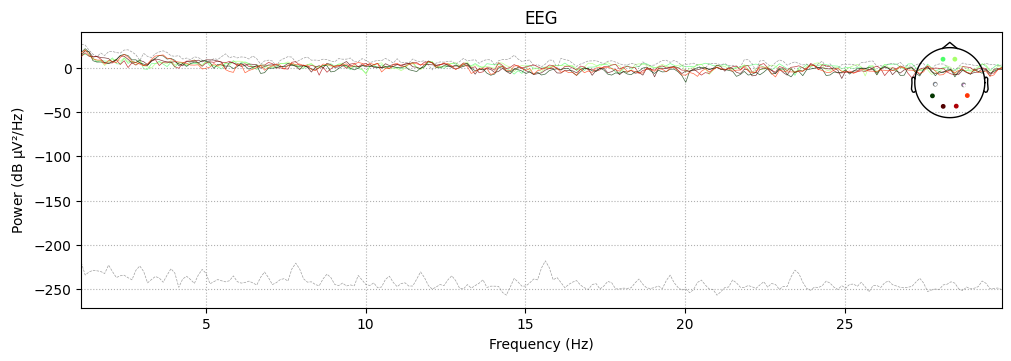

In [15]:
RecA_raw.compute_psd(fmin=1, fmax=30).plot()

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\yuans\AppData\Local\Temp\ipykernel_20288\1287085128.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  RecB_raw.compute_psd(fmin=1, fmax=30).plot()


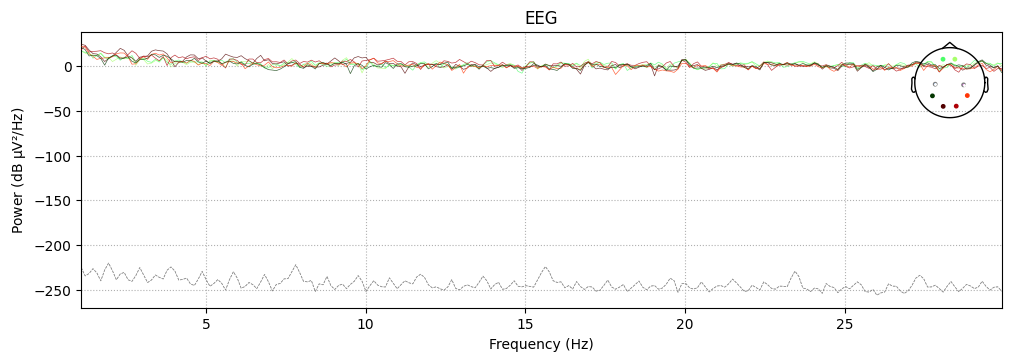

In [16]:
RecB_raw.compute_psd(fmin=1, fmax=30).plot()

### Create the ICA object and fit it to the data

In [17]:
ica = ICA()

ica.fit(RecA_raw)
ica.fit(RecB_raw)

Fitting ICA to data using 6 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 6 components
Fitting ICA took 0.3s.
Fitting ICA to data using 6 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 6 components
Fitting ICA took 0.5s.


c:\Users\yuans\miniconda3\envs\pain_study\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,1000 iterations on raw data (6401 samples)
ICA components,6
Available PCA components,6
Channel types,eeg
ICA components marked for exclusion,—


Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
['C3', 'C4']
Channels marked as bad:
['C3', 'C4']


### Visual inspection of components and frequency response

In [18]:
ica.plot_properties(RecA_raw, picks=range(6), psd_args=dict(fmin=1, fmax=30))

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [19]:
ica.plot_properties(RecB_raw, picks=range(6), psd_args=dict(fmin=1, fmax=30))

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]